## 导入必要的库文件

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import itertools
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objs as go
import math
plt.style.use("seaborn-whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_10249/3469822607.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## 数据分析和探索

#### 从 Dry_Bean_Dataset.arff 文件中读取数据

In [2]:
features = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class']
raw_data = pd.read_csv('../dataset/Dry_Bean_Dataset.arff', names=features)
raw_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### 展示数据信息

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### 将目标的 dtype 从 object 转换为 category

In [4]:
raw_data.Class = raw_data.Class.astype('category')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  ShapeFactor1     13611 non-null  float64 
 13  ShapeFactor2     13611 non-null  float64 
 14  ShapeFactor3     13611 non-null  float64 
 15  ShapeFactor4     13611 non-null  float64 
 16  Class            13611 non-null  categor

#### 显示列属性信息

In [5]:
raw_data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

#### 查看数据中是否由空值及重复值

In [6]:
raw_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
raw_data.duplicated().sum()

68

#### 删除重复值

In [8]:
raw_data.drop_duplicates(inplace=True)

In [9]:
raw_data.duplicated().sum()

0

#### 查看数据的统计信息

In [10]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,738.860153
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.430306
Eccentricity,13543.0,0.750315,0.091858,0.218951,0.715144,0.763997,0.809671,0.911423
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,263261.000000
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,569.374358
Extent,13543.0,0.749829,0.048939,0.555315,0.718735,0.759903,0.786849,0.866195
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.994677


In [11]:
raw_data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## 数据可视化

#### 通过直方图查看各个属性的大致分布

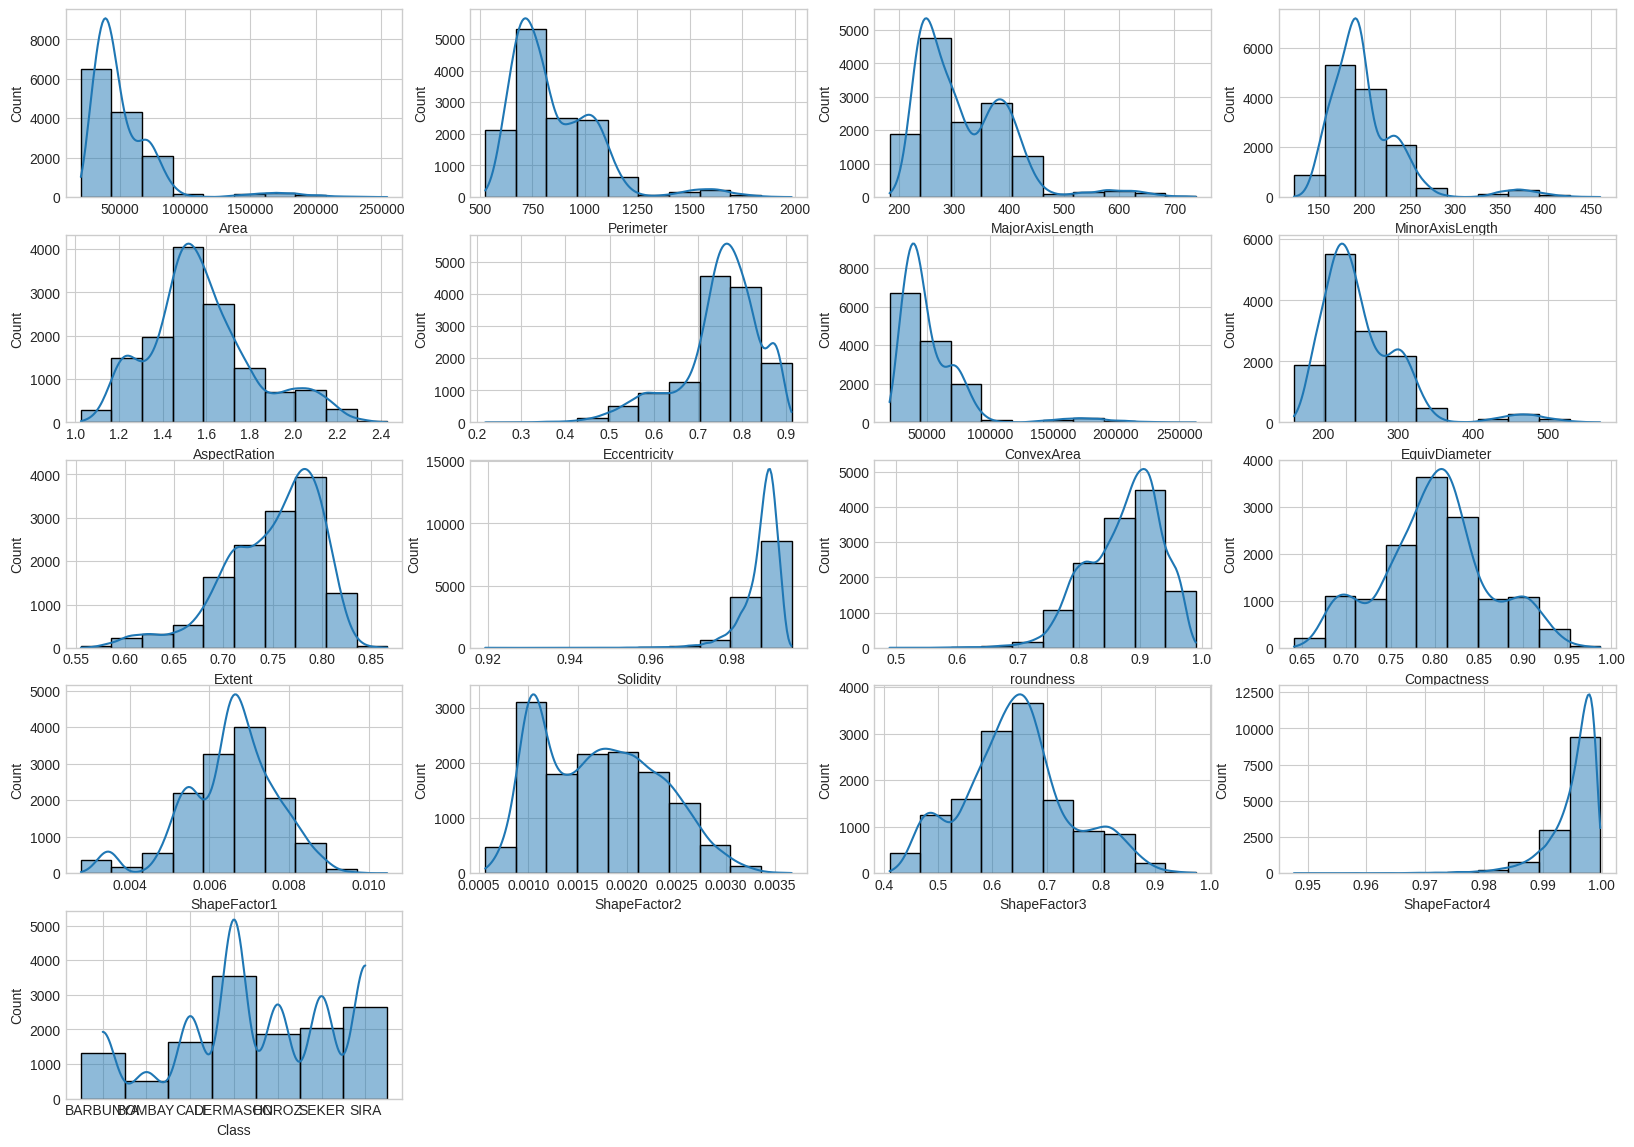

In [12]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(list(raw_data.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(raw_data[col], kde=True, bins=10)

#### 查看每个属性在不同类别下的分布

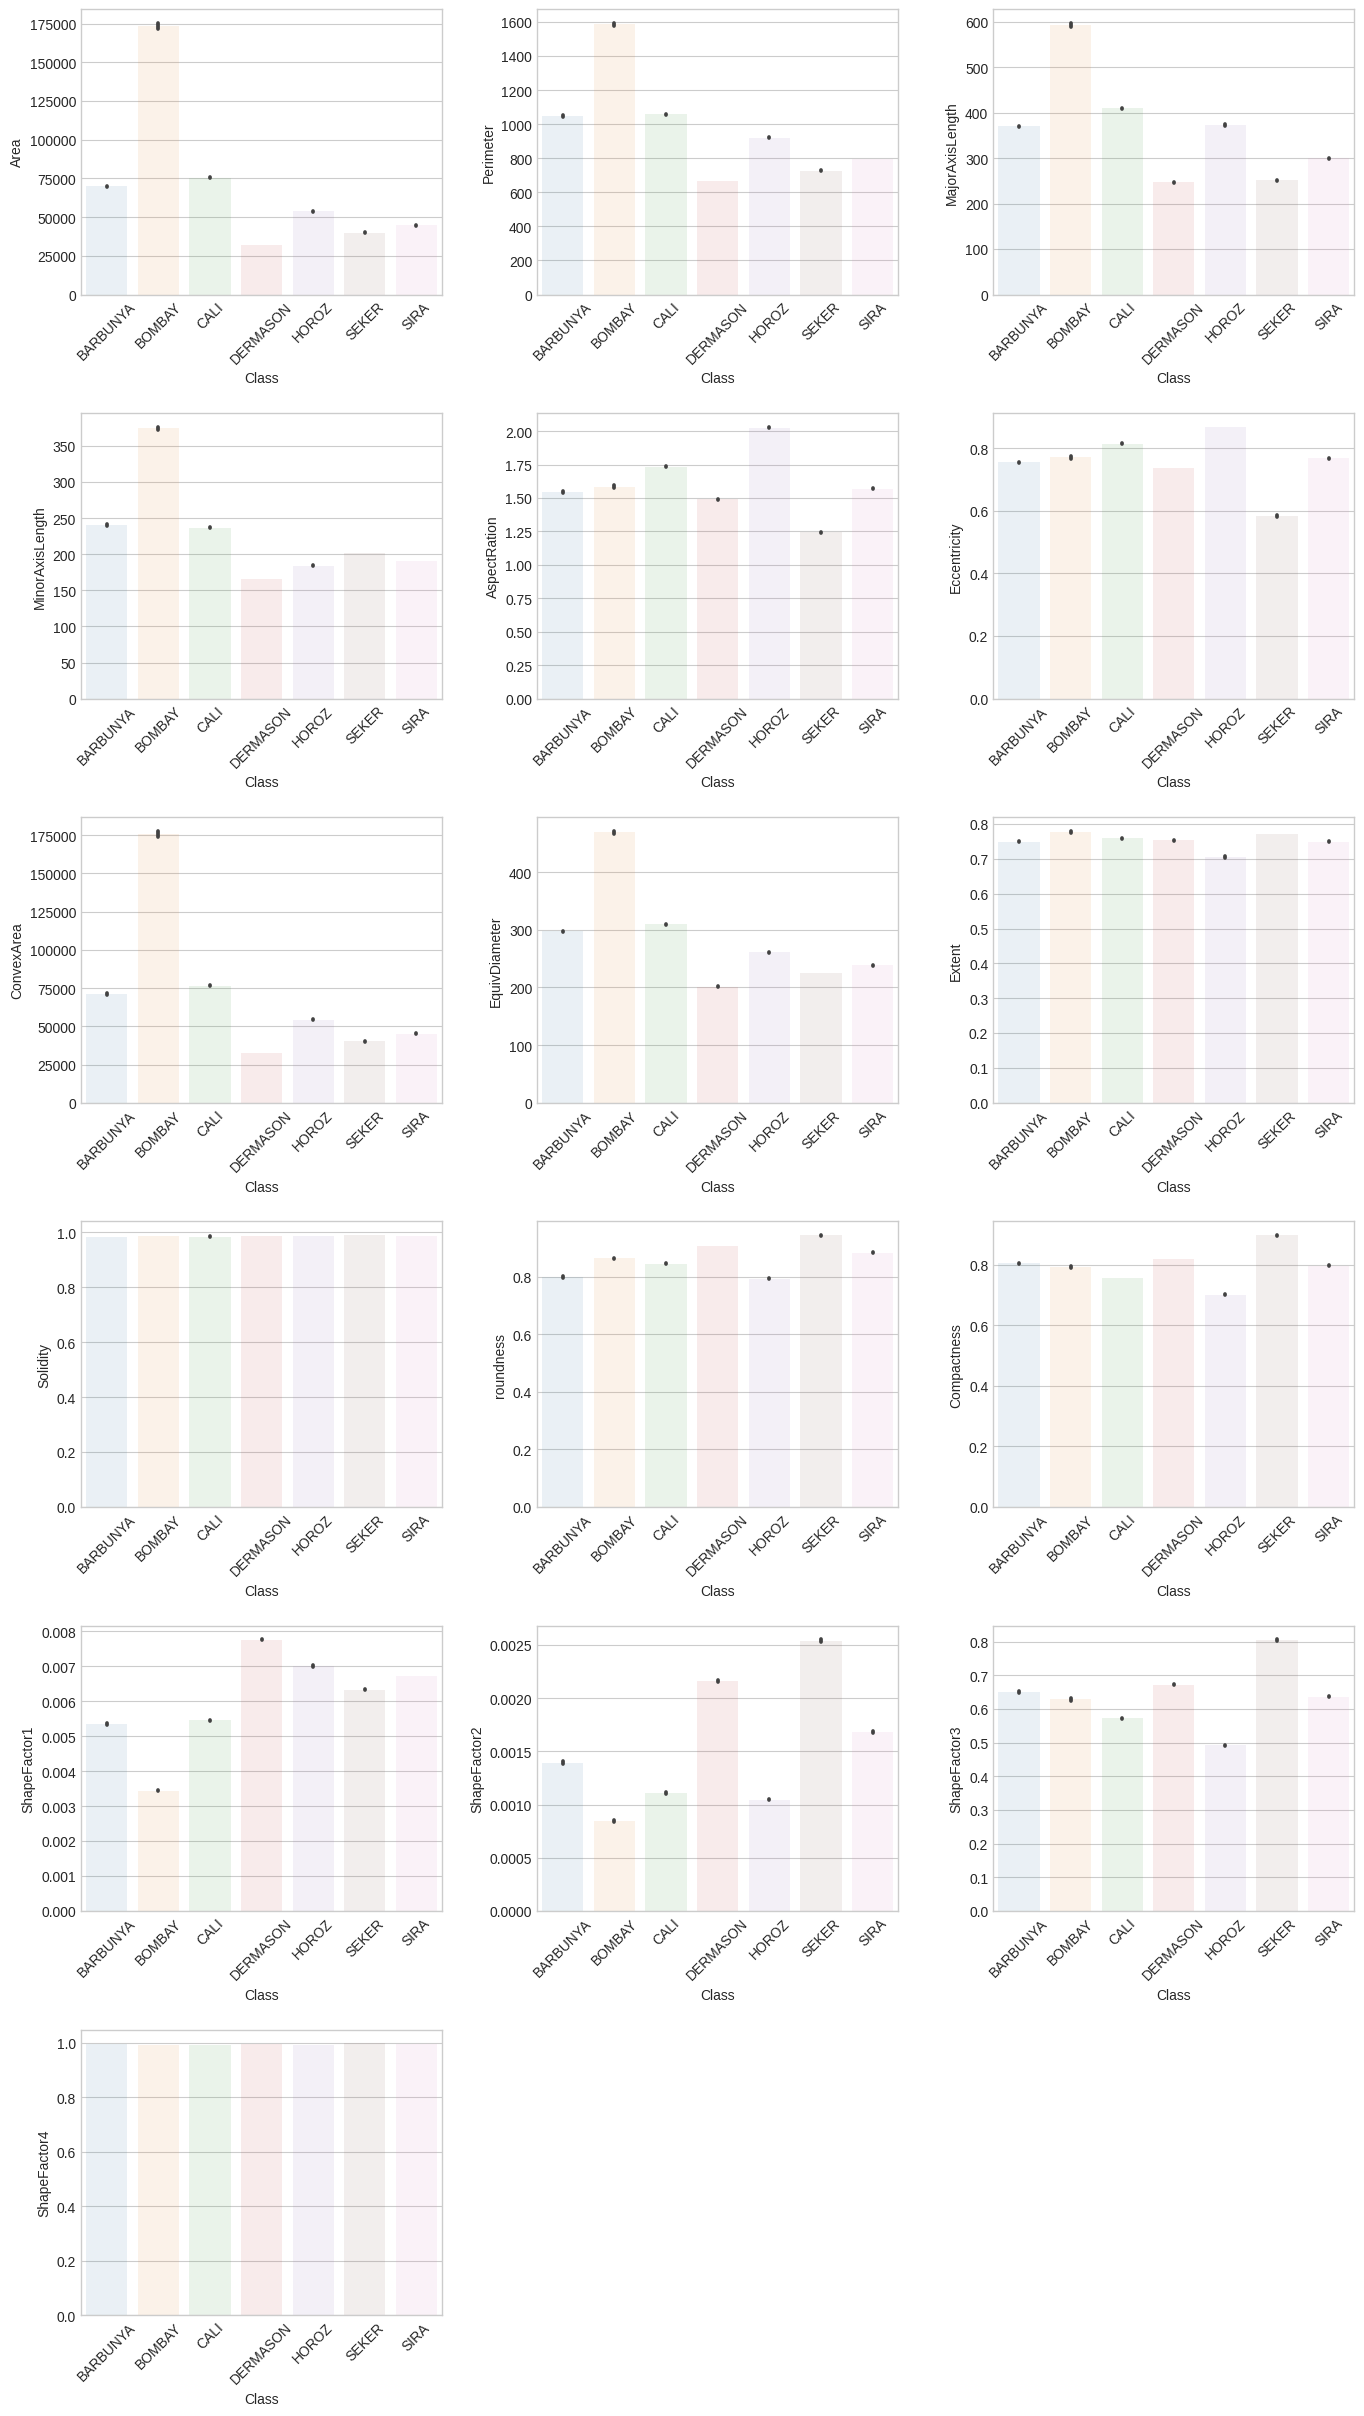

In [13]:
def plot_subplots(subplots, plot, n=3):
    m = len(subplots)
    height = (m//n + (m%n != 0)) * 4
    plt.figure(figsize=(14, height))
    for i, c in enumerate(subplots):
        plt.subplot(m//n + min(1, m%n), n, i+1)
        plot(c)
        plt.tight_layout(pad=2.0)
        plt.xticks(rotation=45)
        
num_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
           'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
           'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
           'ShapeFactor3', 'ShapeFactor4']

plot_subplots(num_cols, lambda c: sns.barplot(data=raw_data, x='Class', alpha=0.1, y=c))

#### 对 Area/Perimeter/AspectRation/Eccentricity/roundness/Compactness 这些强相关属性进行散点图矩阵分析

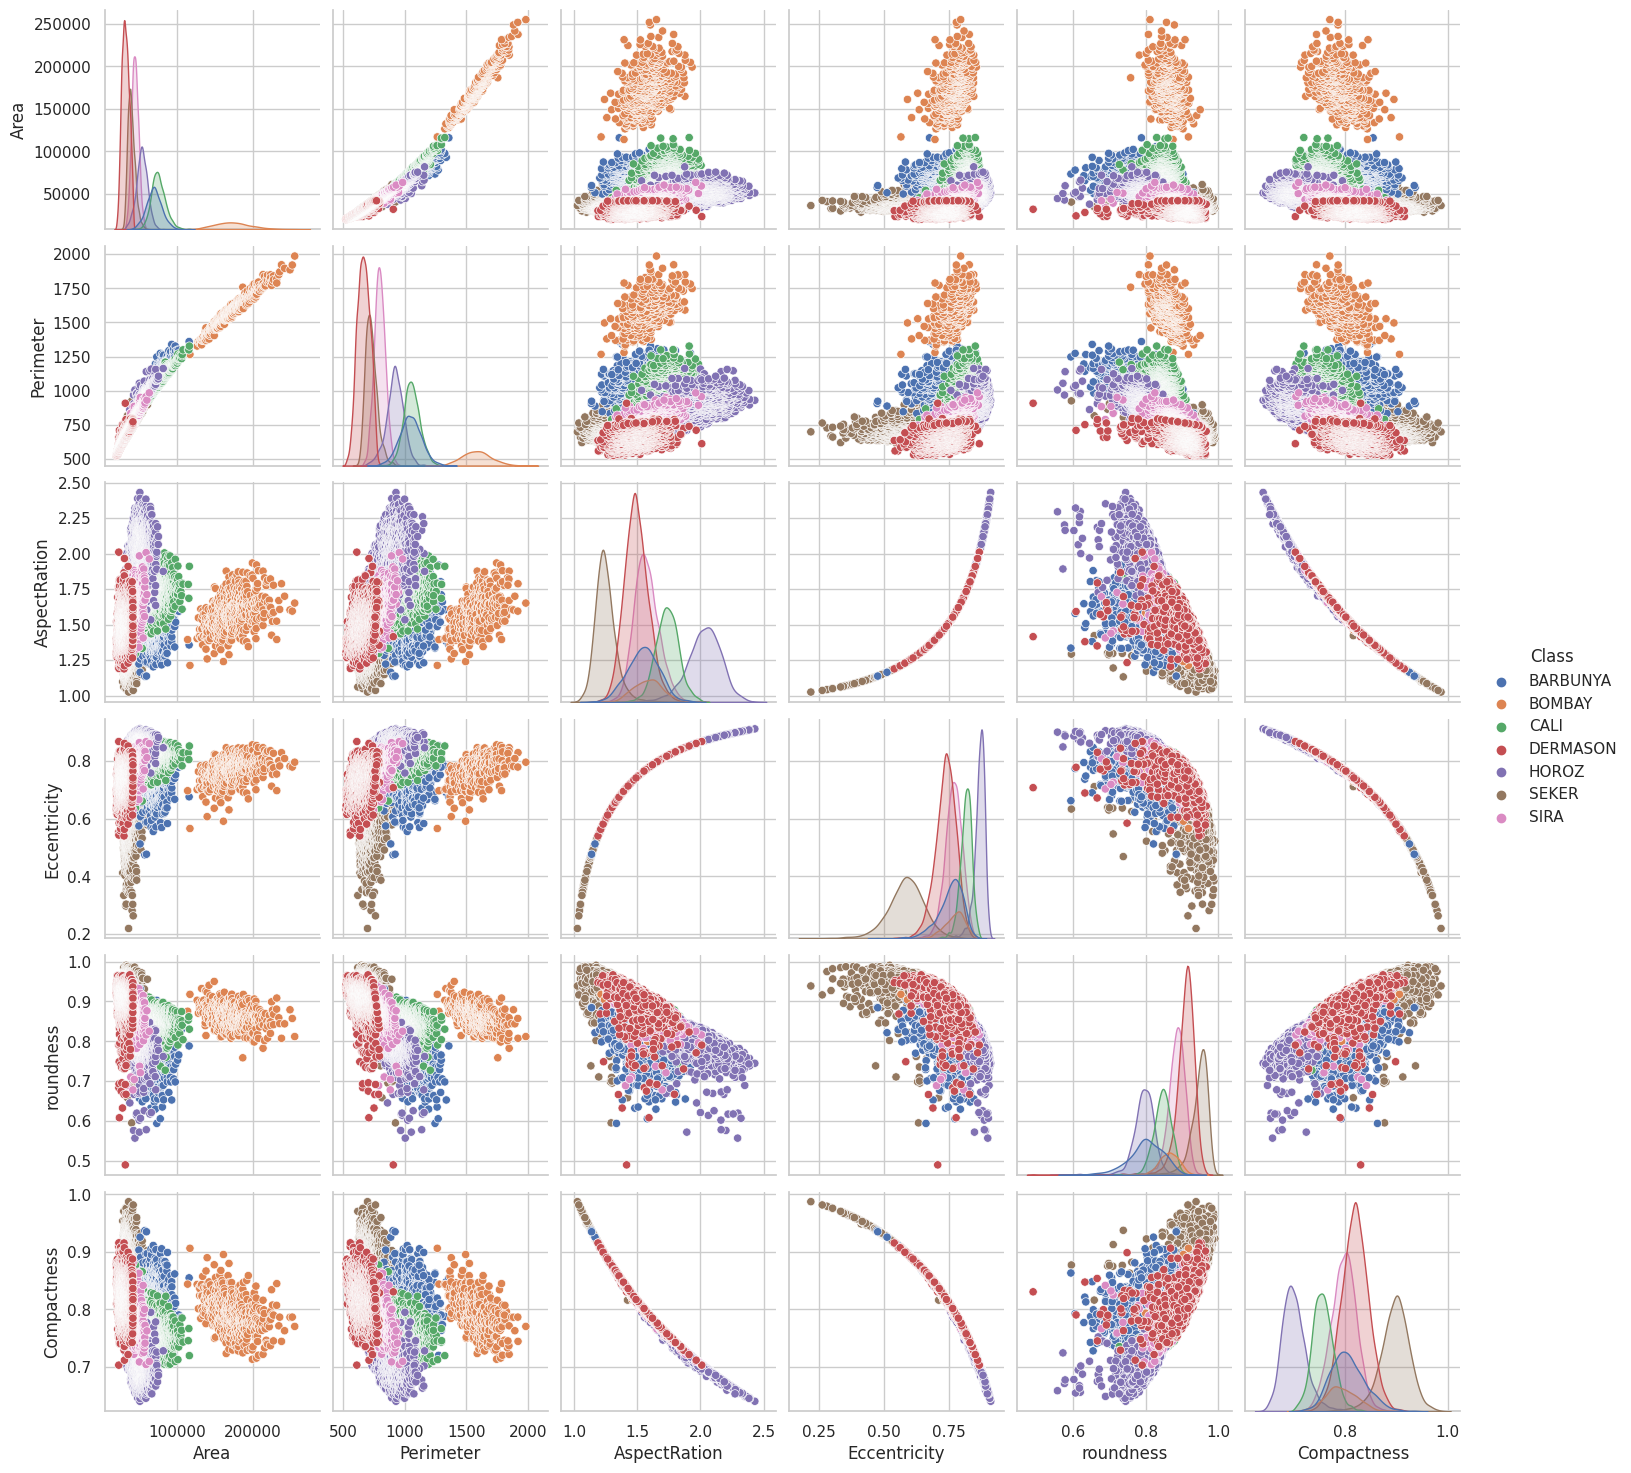

In [14]:
Strongly_corr_features = raw_data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="Class")

#### 显示每个属性与类别的关系

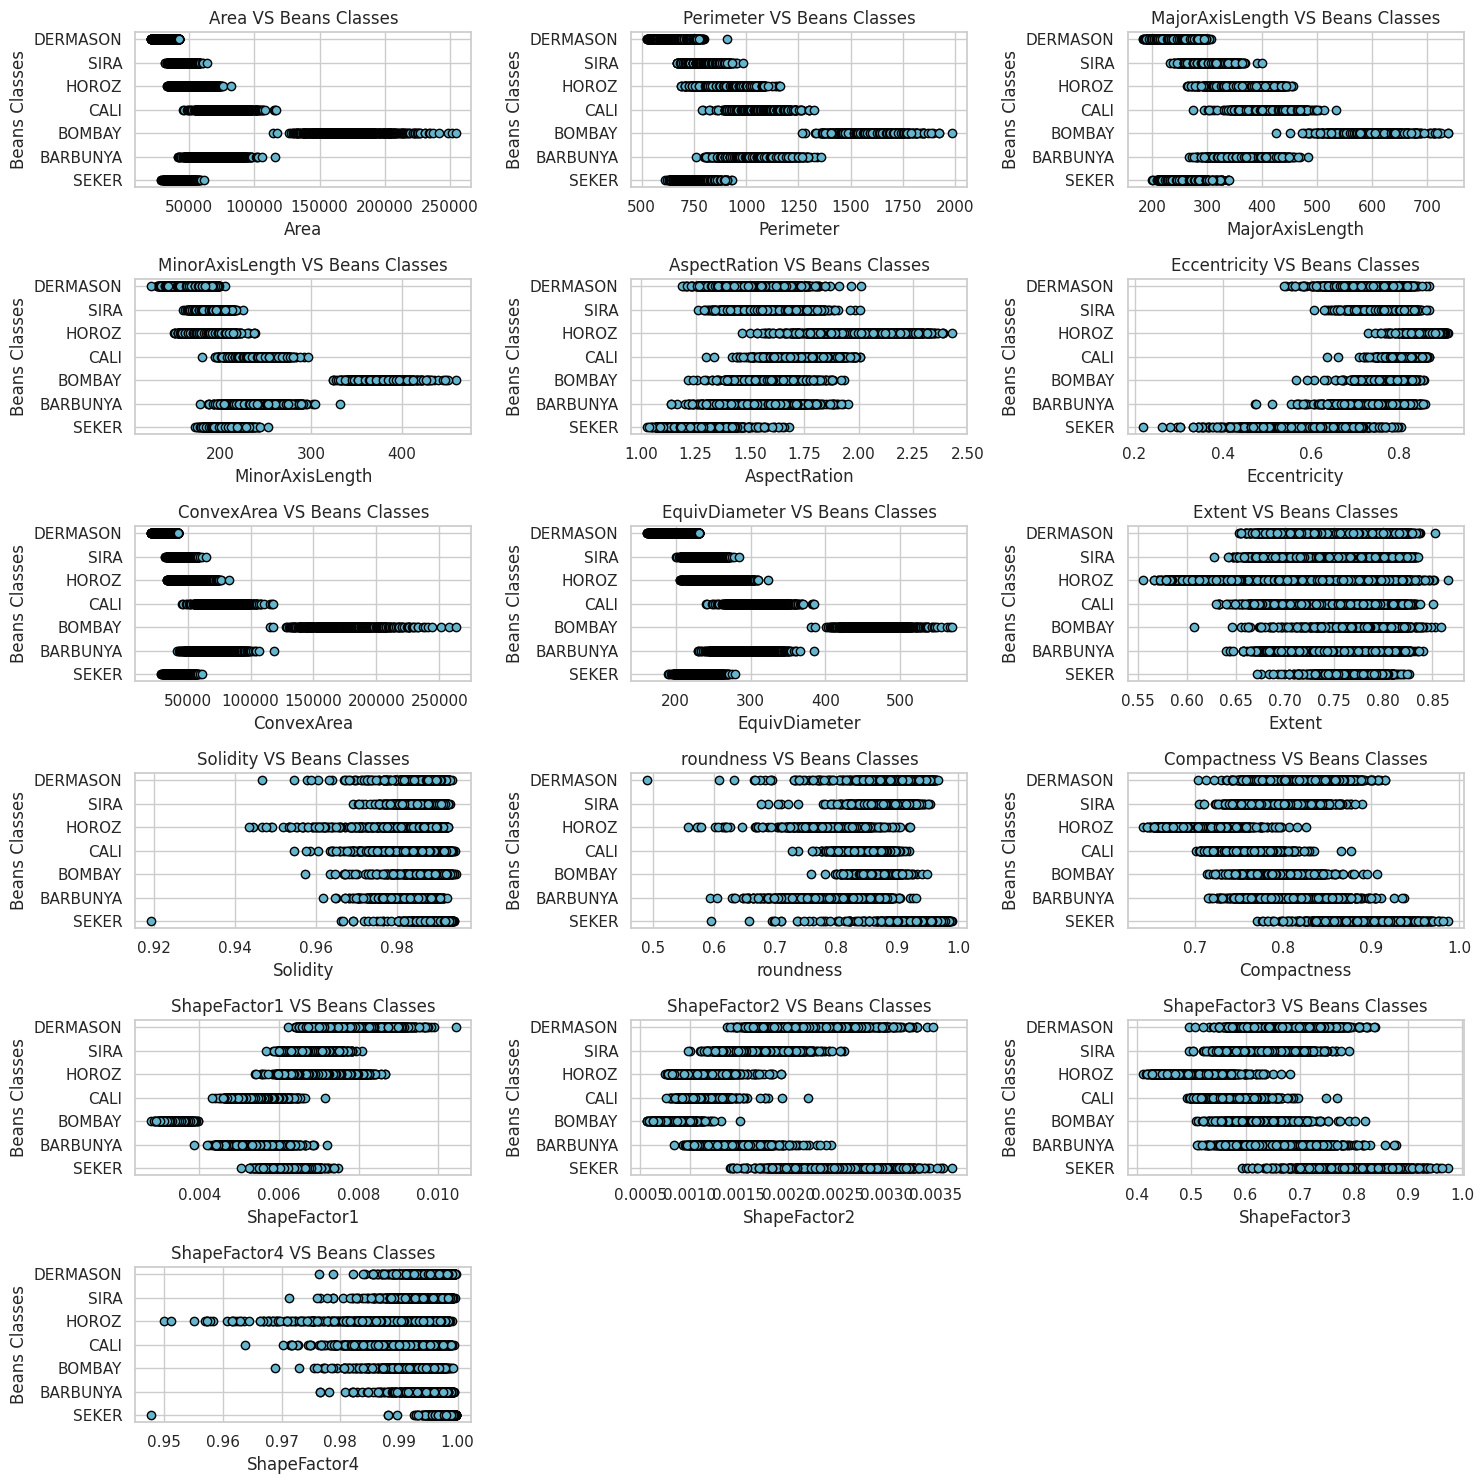

In [15]:
visualization_df=raw_data
i = 1
plt.figure(figsize = [15, 15], tight_layout = 5)
for column in visualization_df.drop(['Class'], axis=1).columns:
    plt.subplot(6, 3, i)
    plt.scatter(data = visualization_df, x = column, y = 'Class', c='c', edgecolors='black')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

#### 数据集中出现最多的类别

In [16]:
raw_data.Class.mode()

0    DERMASON
Name: Class, dtype: category
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

#### 绘制数据集中所有数值列之间的相关性热图

<Axes: >

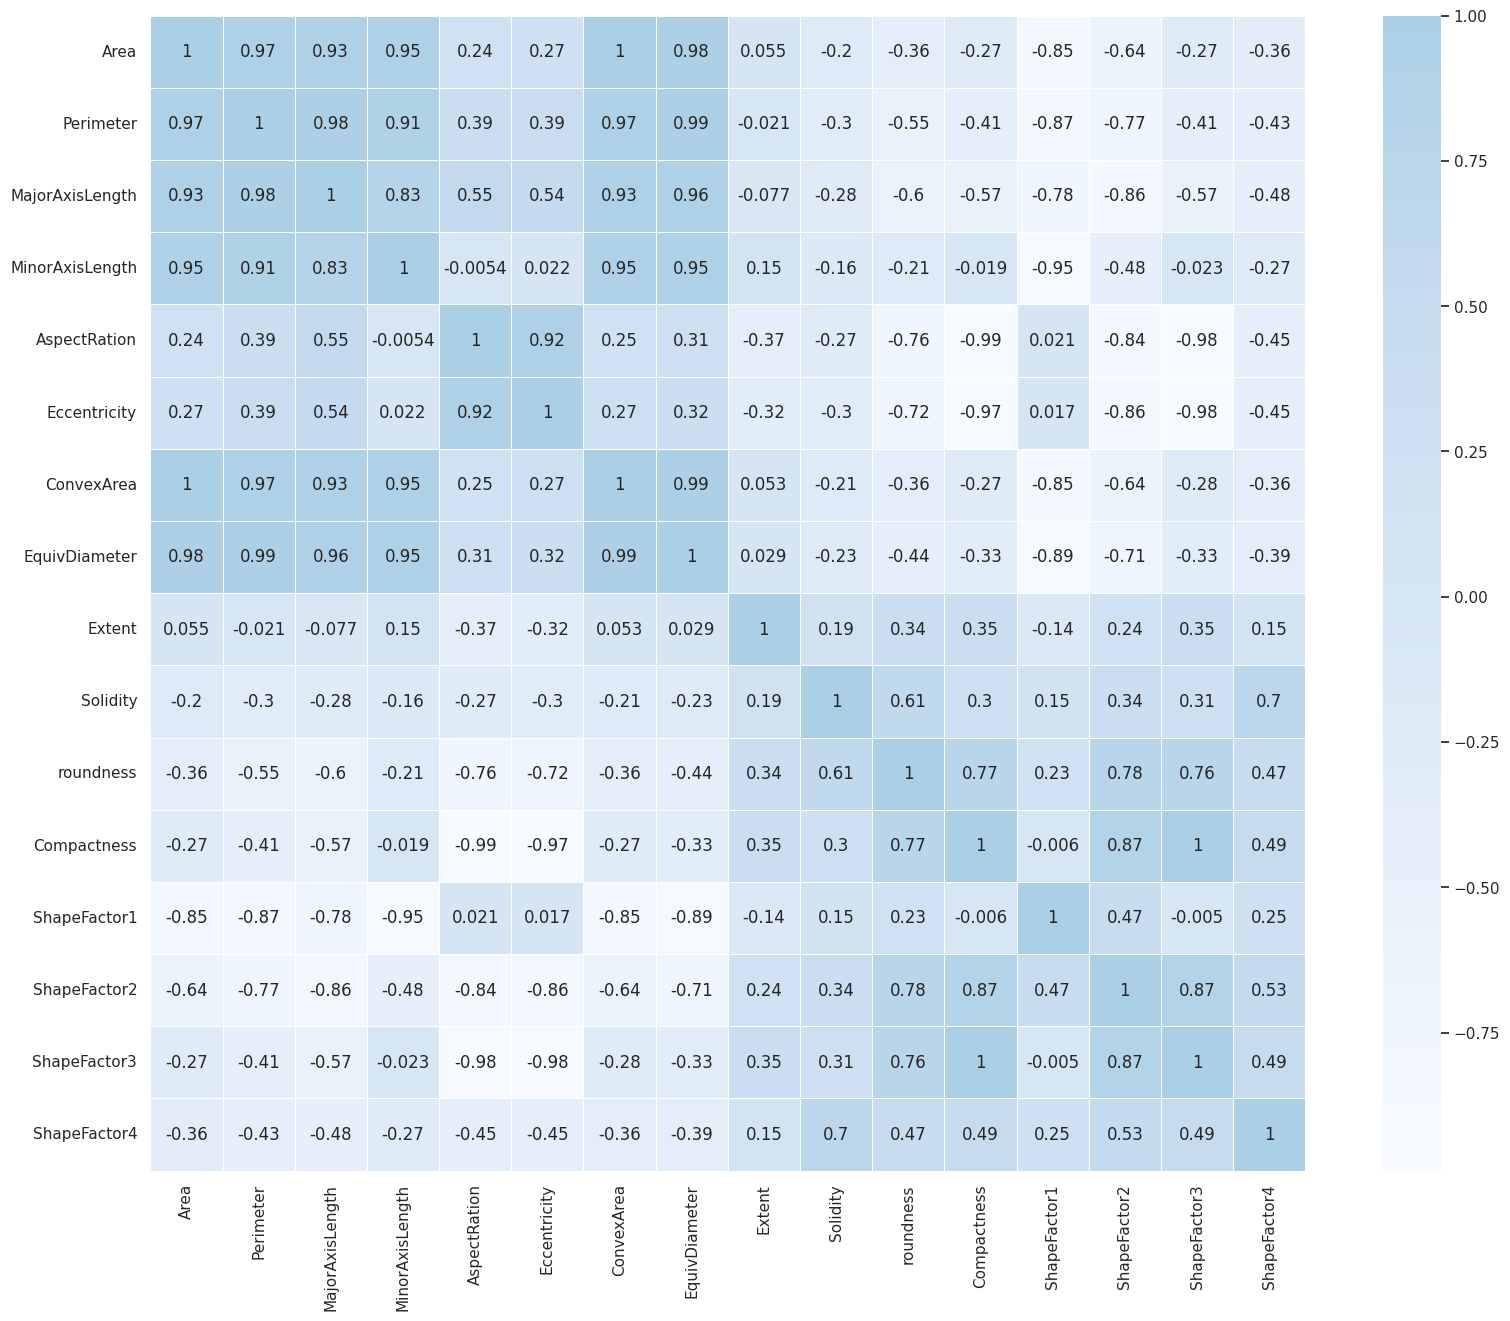

In [17]:
corr = raw_data.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = .5, center = 2, ax = axes, cmap='Blues')

## 特征工程

#### 将 rawdata 进行复制并显示前10行

In [18]:
data = raw_data.copy()
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


#### 计算和绘制特征与目标变量之间的互信息分数

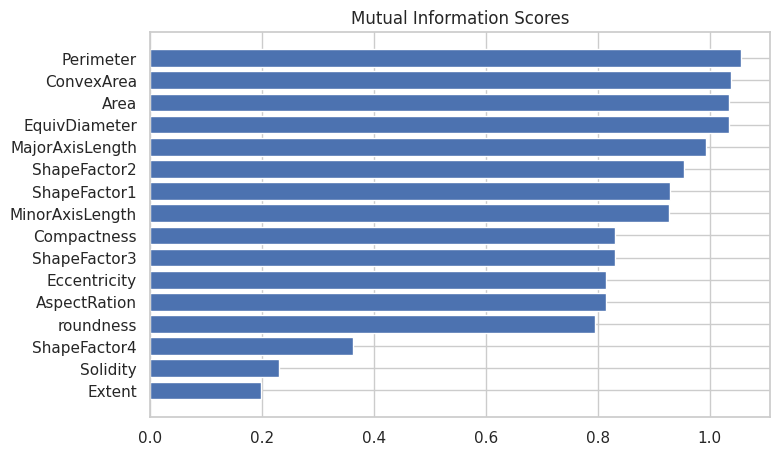

In [19]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Label encoding for categoricals
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = data.dtypes == int

mi_scores = make_mi_scores(data.drop(columns=['Class']), data.Class, discrete_features=False)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#### 计算每个连续特征的偏度

In [20]:
def calc_skew(df):
    print("\nIF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 \n")
    for col in df.loc[:, df.dtypes != np.object ]:
        print("the skewness of ",col,"is :",df[col].skew())

calc_skew(data.drop(['Class'], axis=1))


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  Area is : 2.9471356093223906
the skewness of  Perimeter is : 1.6280182896188335
the skewness of  MajorAxisLength is : 1.3658128808796521
the skewness of  MinorAxisLength is : 2.2320134464858525
the skewness of  AspectRation is : 0.5890446139852354
the skewness of  Eccentricity is : -1.0649316013992907
the skewness of  ConvexArea is : 2.936102309274981
the skewness of  EquivDiameter is : 1.9473028025362167
the skewness of  Extent is : -0.8956552957043488
the skewness of  Solidity is : -2.5468767973800115
the skewness of  roundness is : -0.6487254756912723
the skewness of  Compactness is : 0.03630899543838119
the skewness of  ShapeFactor1 is : -0.5304266158500612
the skewness of  ShapeFactor2 is : 0.29433219993099846
the skewness of  ShapeFactor3 is : 0.24276656943282973
the skewness of  ShapeFactor4 is : -2.7601250309668046


## 数据预处理

In [21]:
# normalize the data
def normalize_data(df,column):
    return StandardScaler().fit_transform(np.array(df[column]).reshape(-1,1))

def removeOutliers(df,outliersColomns):
    z_scores = stats. zscore(df[outliersColomns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

class_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
def removeOutliers_cat(df_raw,outliersColomns):
    df = df_raw.copy()
    for cat_ in class_labels:
        df_ = df[df['Class']==cat_]
        z_scores = stats. zscore(df_[outliersColomns]) 
        abs_z_scores = np. abs(z_scores)
        filtered_entries = (abs_z_scores < 4). all(axis=1)
        df_ = df_[filtered_entries]
        df = df[df['Class']!=cat_]
        df = df.append(df_)
    return df

# Transform data
def transformation(df,columns,func):
    for col in columns:
        df[col]=func(df[col])
    return df

def encodingTarget(dataset, cols):
    for col_name in cols:
        dataset[col_name] = dataset[col_name].replace({'DERMASON' :0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6})
    return dataset

def decodingTarget(dataset, cols):
    for col_name in cols:
        dataset[col_name] = dataset[col_name].replace({0:'DERMASON' ,1: 'SIRA', 2:'SEKER', 3:'HOROZ', 4:'CALI',5: 'BARBUNYA', 6:'BOMBAY'})
    return dataset

In [22]:
data = raw_data.copy()

def prepare_data(df, isTest=False):    
    outliersColomns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                       'ShapeFactor3', 'ShapeFactor4']
    
    if isTest == False:
        before_ = len(df)
        df = removeOutliers_cat(df,outliersColomns)
        print('Removed ',before_ - len(df),' outliers')

    ## define new attributes computed by existing ones
    df['ShapeFactor5'] = df['MajorAxisLength'] / df['Perimeter']
    df['ShapeFactor6'] = df['MinorAxisLength'] / df['Perimeter']
    df['ShapeFactor7'] = df['Eccentricity'] * df['Area']
    df['ShapeFactor8'] = df['Eccentricity'] * df['Perimeter']
    df['ShapeFactor9'] = df['Extent'] * df['Area']
    df['ShapeFactor10'] = df['Extent'] * df['Perimeter']
    
    NonScaledFeatures=['Class']
    for col_name in df.columns:
        if col_name not in NonScaledFeatures:
            scaled_col = col_name + '_r'
            df[col_name] = df[col_name].fillna(df[col_name].mean())  
            df[scaled_col]= df[col_name]
            df[col_name]=normalize_data(df,col_name)
            
    return df
  

data = prepare_data(data)
# encode label 
labelencoder = LabelEncoder()
data['Class'] = labelencoder.fit_transform(data['Class'])
        

Removed  275  outliers


#### 预处理过的数据集

In [23]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1_r,ShapeFactor2_r,ShapeFactor3_r,ShapeFactor4_r,ShapeFactor5_r,ShapeFactor6_r,ShapeFactor7_r,ShapeFactor8_r,ShapeFactor9_r,ShapeFactor10_r
10066,-1.108735,-1.518476,-1.499670,-1.466687,-0.728888,-0.538682,-1.105546,-1.545561,-0.056349,-0.549140,...,0.009346,0.002925,0.712362,0.999049,0.361935,0.258074,14347.782563,370.479041,15294.934112,394.935767
10068,-1.100353,-1.532402,-1.559834,-1.339985,-1.107682,-1.144180,-1.098326,-1.529212,0.887357,-0.145733,...,0.008985,0.003214,0.761580,0.997414,0.354158,0.270419,13373.977152,339.281612,16434.694291,416.928300
10069,-1.097808,-1.489141,-1.387049,-1.560382,-0.246824,0.031872,-1.096020,-1.524268,0.803189,-0.064492,...,0.009666,0.002562,0.655546,0.996773,0.375764,0.247128,15658.245820,402.806227,16408.712012,422.111867
10070,-1.092515,-1.507898,-1.500517,-1.395323,-0.863013,-0.733623,-1.091541,-1.514011,-0.159605,0.212648,...,0.009129,0.002997,0.729557,0.999196,0.360246,0.263032,14309.527284,362.612113,15546.521234,393.958291
10072,-1.079891,-1.477526,-1.468115,-1.384344,-0.801620,-0.642046,-1.078303,-1.489705,0.244012,-0.009208,...,0.009100,0.002921,0.721350,0.998804,0.361049,0.260755,14742.236328,371.575044,16243.084811,409.403622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,6.248327,4.959971,4.864467,4.666430,0.843609,0.858301,6.245044,4.989395,0.694799,-0.376768,...,0.003111,0.000590,0.554460,0.991160,0.384113,0.214875,196671.808281,1592.874210,186046.917011,1506.821637
3867,6.385827,4.840262,4.727489,4.986853,0.484427,0.636390,6.366987,5.068063,1.445956,0.084797,...,0.003010,0.000630,0.582354,0.989790,0.383121,0.225413,195132.508236,1533.053462,198082.679197,1556.231404
3868,6.626826,4.787333,4.595755,5.400975,0.090313,0.341112,6.593054,5.204368,1.174069,0.500811,...,0.002878,0.000679,0.618625,0.991718,0.379428,0.236684,194166.018976,1472.953218,200611.392105,1521.848144
3869,6.728899,4.951522,4.643148,5.509256,0.056320,0.312571,6.805082,5.261511,0.339999,-2.641610,...,0.002860,0.000676,0.619043,0.987235,0.374570,0.234874,195860.694318,1495.540263,192792.035034,1472.108796


In [24]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1_r,ShapeFactor2_r,ShapeFactor3_r,ShapeFactor4_r,ShapeFactor5_r,ShapeFactor6_r,ShapeFactor7_r,ShapeFactor8_r,ShapeFactor9_r,ShapeFactor10_r
count,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,1.326800e+04,...,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000,13268.000000
mean,-6.854799e-17,6.854799e-17,8.911238e-16,3.770139e-16,-2.056440e-16,-6.854799e-17,6.854799e-17,-4.112879e-16,1.036788e-15,2.124988e-15,...,0.006555,0.001718,0.644433,0.995241,0.373243,0.239766,40603.916190,649.312997,39941.943597,641.176681
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,...,0.001127,0.000595,0.098431,0.003895,0.020442,0.024547,24263.856822,205.436036,23047.784432,169.761195
min,-1.108735e+00,-1.532402e+00,-1.559834e+00,-1.617318e+00,-2.171135e+00,-4.896172e+00,-1.105546e+00,-1.545561e+00,-3.987099e+00,-6.474237e+00,...,0.002778,0.000564,0.410339,0.966349,0.308066,0.173214,10057.104885,200.399221,15090.808731,383.970102
25%,-5.699248e-01,-7.074470e-01,-7.796590e-01,-5.863177e-01,-6.102678e-01,-3.810129e-01,-5.725594e-01,-6.417443e-01,-6.339404e-01,-3.787264e-01,...,0.005882,0.001157,0.582725,0.993821,0.360609,0.224154,24526.330362,487.368655,27492.027744,532.460186
50%,-2.900977e-01,-2.861631e-01,-2.747166e-01,-2.213030e-01,-1.289151e-01,1.469918e-01,-2.915793e-01,-2.519189e-01,2.051848e-01,2.350036e-01,...,0.006641,0.001700,0.642687,0.996431,0.373703,0.240294,33648.888886,605.707690,33091.444118,588.107187
75%,2.858700e-01,5.702819e-01,6.567979e-01,3.327165e-01,5.000825e-01,6.469090e-01,2.893005e-01,4.500382e-01,7.553861e-01,6.560477e-01,...,0.007264,0.002173,0.696281,0.997908,0.385495,0.254060,50249.529516,802.030630,45455.851668,725.384116
max,6.836944e+00,5.256092e+00,4.872795e+00,5.714888e+00,3.467478e+00,1.760621e+00,7.000163e+00,5.321626e+00,2.374386e+00,1.803805e+00,...,0.009897,0.003665,0.952371,0.999733,0.428848,0.308065,202624.851901,1592.874210,200611.392105,1556.231404


In [25]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10',
       'Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'],
      dtype='object')

#### 预处理数据集每个属性与类别的关系

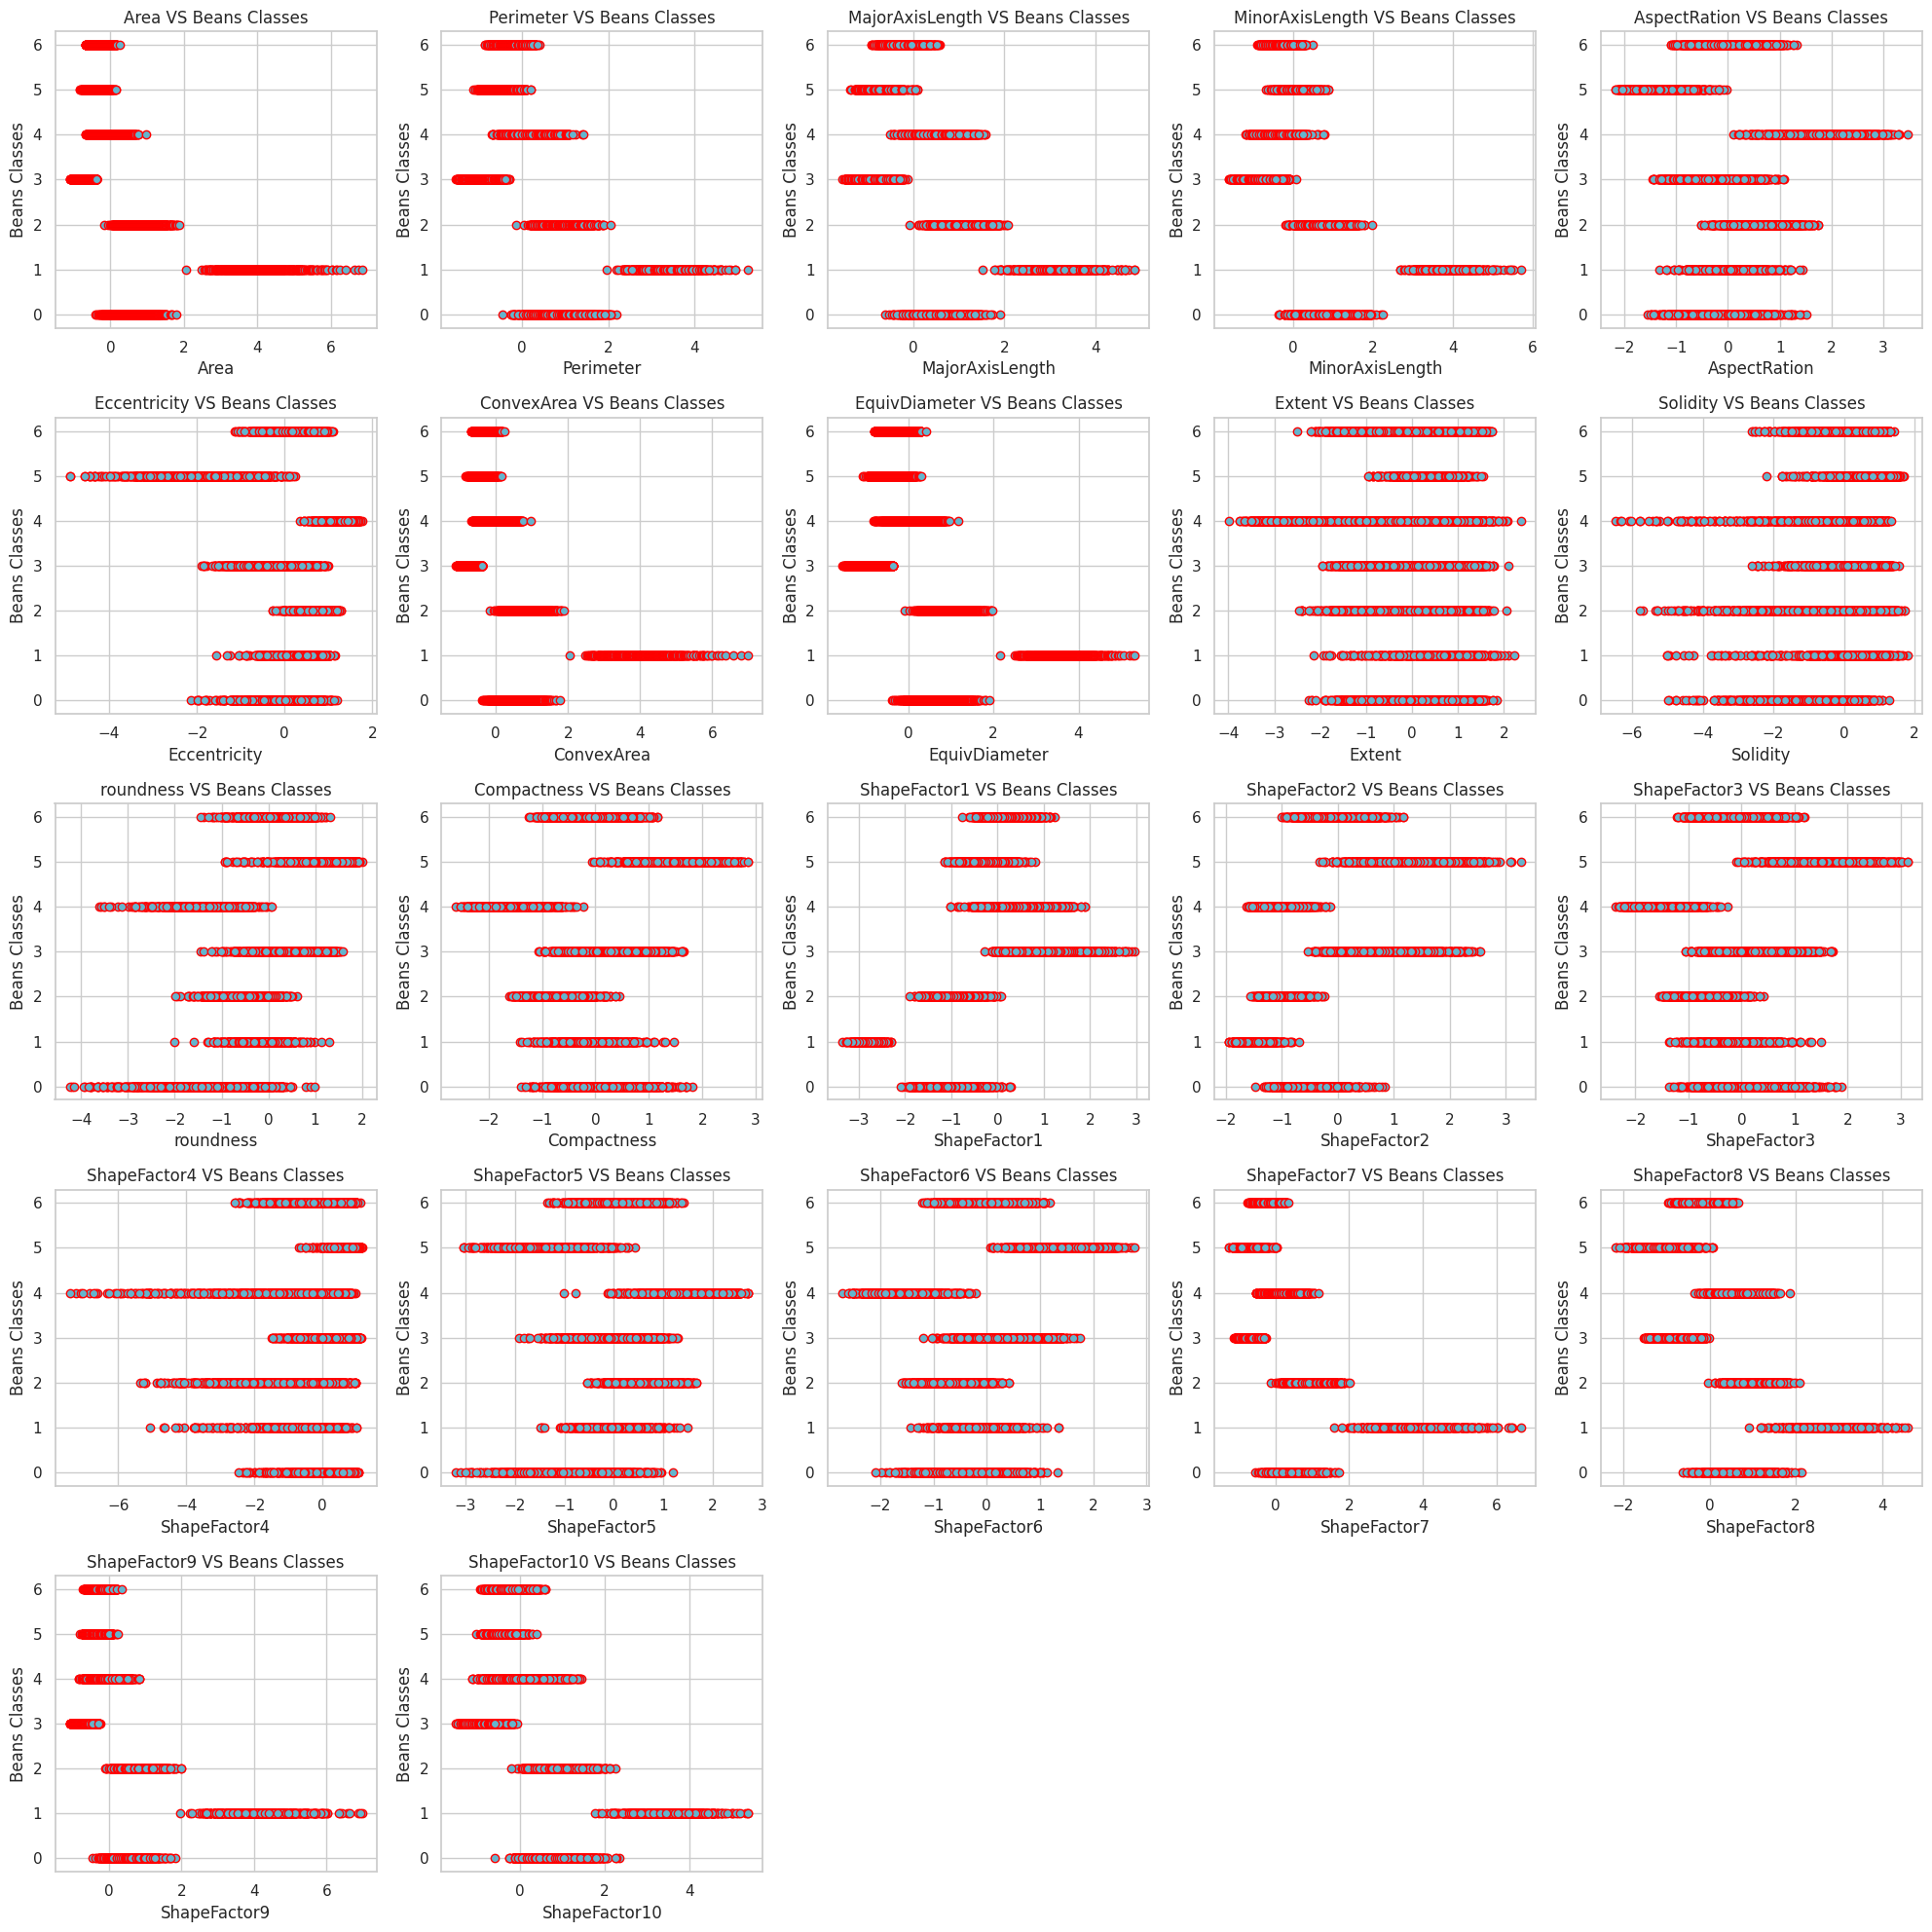

In [26]:
visualization_df=data.drop(['Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'], axis=1)
i = 1
plt.figure(figsize = [20, 20], tight_layout = 5)
for column in visualization_df.drop(['Class'], axis=1).columns:
    plt.subplot(5, 5, i)
    plt.scatter(data = visualization_df, x = column, y = 'Class', c='c', edgecolors='red')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

#### 数据集划分

In [27]:
# split train and test data
train_data, test_df = train_test_split(data, test_size=0.15, random_state=42)

# split train and validation data from train_data
train_df, val_df = train_test_split(train_data, test_size=0.15, random_state=42) 

# split features and labels
x_train = train_df.drop(columns=['Class'])
y_train = train_df['Class']

x_val = val_df.drop(columns=['Class'])
y_val = val_df['Class']

x_test = test_df.drop(columns=['Class'])
y_test = test_df['Class']

In [28]:
x_train.shape[0], x_val.shape[0], x_test.shape[0]

(9585, 1692, 1991)

#### 删除高相关冗余特征：ConvexArea 和 Compactness

In [29]:
model_columns = [
                  'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                  'AspectRation', 'Eccentricity', 'roundness', 'Extent',  'ShapeFactor5',
                  'Solidity','ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
                  ]

In [30]:

y_labels_Post = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
print(y_labels_Post)
def ModelPredictionsPostProcessing(predictions_t,train_x,param=[0.00397101, 0.008575, 635.011, 30917.0, 0.539964, 0.838197, 0.966603, 0.9637, 2.01, 126500.0, 0.49473, 0.70337, 66105.9, 1155.934, 237.238412, 454.231985, 305.811572, 75191.0, 0.005591039999999999, 0.815341, 0.515836, 0.817632, 0.387031]):
  #This function do preprossing on the model predictions to decrease the errors of the model
    predictions_ = predictions_t.copy()
    for i in range(len(predictions_)):
        if (train_x['ShapeFactor1_r'].array[i] < param[0]) and (train_x['Area_r'].array[i] >param[9]):#param1,param10
            predictions_[i] = y_labels_Post[6]#'BOMBAY'
        elif  (train_x['ShapeFactor1_r'].array[i] > param[1]) or (train_x['Perimeter_r'].array[i] < param[2]) or (train_x['Area_r'].array[i] <param[3]):#param2, param3, param4
            predictions_[i] = y_labels_Post[0]#'DERMASON'
        else:
            if (train_x['Solidity_r'].array[i] >  0.9928774928774928 ) and predictions_[i] == y_labels_Post[ 0 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Extent_r'].array[i] <  0.7044686791405081 ) and predictions_[i] == y_labels_Post[ 2 ] :
                    predictions_[i] = y_labels_Post[ 1 ]
            if (train_x['Extent_r'].array[i] <  0.6469956019402373 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['roundness_r'].array[i] <  0.7959889783638006 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['Area_r'].array[i] <  55938 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['Extent_r'].array[i] <  0.6475477522670268 ) and predictions_[i] == y_labels_Post[ 5 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['AspectRation_r'].array[i] <  1.4973590208757783 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] >  0.9989583842744816 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor5_r'].array[i] >  0.387031233685577 ) and predictions_[i] == y_labels_Post[ 5 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor5_r'].array[i] <  0.32719460392194527 ) and predictions_[i] == y_labels_Post[ 0 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Area_r'].array[i] >  57790 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['Area_r'].array[i] >  57790 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 5 ]
            if (train_x['ShapeFactor4_r'].array[i] <  0.9840169199256958 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['ShapeFactor9_r'].array[i] >  43651.16685252113 ) and predictions_[i] == y_labels_Post[ 1 ] :
                predictions_[i] = y_labels_Post[ 2 ]
            if (train_x['Area_r'].array[i] <  55938 ) and predictions_[i] == y_labels_Post[ 4 ] :
                predictions_[i] = y_labels_Post[ 3 ]
            if (train_x['MinorAxisLength_r'].array[i] >  231.34609602337528 ) and predictions_[i] == y_labels_Post[ 3 ] :
                predictions_[i] = y_labels_Post[ 4 ]
            if (train_x['Perimeter_r'].array[i] >  881.1379999999998 ) and predictions_[i] == y_labels_Post[ 2 ] :
                predictions_[i] = y_labels_Post[ 5 ]

    return predictions_

['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']


## 在数据集上训练及验证不同的分类模型，然后进行测试

#### 1- GradientBoostingClassifier

In [31]:
# Gradient Boosting algorithm 

gb_model = GradientBoostingClassifier( n_estimators=600, learning_rate=0.05, max_depth=5, random_state=42)
param_grid = dict(n_estimators=[600], learning_rate=[0.05], max_depth=[5], random_state=[42])
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, scoring="accuracy", cv=kfold, n_jobs=-1, verbose=False)

gb_model = gb_model.fit(x_train[model_columns], y_train)
predictions_GB = gb_model.predict(x_val[model_columns])

print("Mean_F1_score: ", f1_score(y_val, predictions_GB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_GB))

Mean_F1_score:  0.9284869976359338
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       163
           1       1.00      1.00      1.00        69
           2       0.94      0.98      0.96       203
           3       0.91      0.92      0.91       447
           4       0.96      0.96      0.96       203
           5       0.93      0.96      0.94       255
           6       0.89      0.87      0.88       352

    accuracy                           0.93      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.93      0.93      0.93      1692



In [32]:
test_GB = gb_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_GB, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_GB))

Mean_F1_test_score:  0.9387242591662481
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       188
           1       1.00      1.00      1.00        79
           2       0.96      0.98      0.97       221
           3       0.93      0.92      0.92       535
           4       0.97      0.97      0.97       289
           5       0.97      0.95      0.96       305
           6       0.86      0.89      0.88       374

    accuracy                           0.94      1991
   macro avg       0.95      0.95      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 2- XGB Classifier:

In [33]:
# XGB Classifier:

xgb_model = XGBClassifier(learning_rate=0.07, random_state =42, objective='multi:softmax', max_depth=5, reg_alpha = 0.002, gamma=0.01, verbosity=0) 
 
xgb_model.fit(x_train[model_columns], y_train)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=kfold )
predictions_XGB = xgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_XGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_XGB))

Mean_F1_score 0.9284869976359338
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       163
           1       1.00      1.00      1.00        69
           2       0.92      0.99      0.95       203
           3       0.91      0.92      0.92       447
           4       0.95      0.96      0.95       203
           5       0.94      0.98      0.96       255
           6       0.90      0.85      0.88       352

    accuracy                           0.93      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.93      0.93      0.93      1692



In [34]:
test_XGB = xgb_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_XGB, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_XGB))

Mean_F1_test_score:  0.9377197388247112
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       188
           1       1.00      0.99      0.99        79
           2       0.96      0.98      0.97       221
           3       0.92      0.93      0.92       535
           4       0.97      0.97      0.97       289
           5       0.97      0.95      0.96       305
           6       0.87      0.88      0.88       374

    accuracy                           0.94      1991
   macro avg       0.95      0.95      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 3- LightGB Classifier:

In [35]:
# build the lightgbm model

lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.05, reg_alpha=0.0001)
lgb_model.fit(x_train[model_columns], y_train)
predictions_LGB = lgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_LGB))

Mean_F1_score 0.9296690307328606
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       163
           1       1.00      1.00      1.00        69
           2       0.91      0.98      0.95       203
           3       0.91      0.92      0.92       447
           4       0.95      0.96      0.96       203
           5       0.96      0.96      0.96       255
           6       0.89      0.88      0.88       352

    accuracy                           0.93      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.93      0.93      0.93      1692



In [36]:
test_LGB = lgb_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_LGB))

Mean_F1_test_score:  0.9357106981416373
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       188
           1       1.00      0.99      0.99        79
           2       0.95      0.97      0.96       221
           3       0.92      0.92      0.92       535
           4       0.97      0.97      0.97       289
           5       0.98      0.95      0.96       305
           6       0.86      0.88      0.87       374

    accuracy                           0.94      1991
   macro avg       0.95      0.95      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 4- BaggingClassifier:

In [37]:
bag_model = BaggingClassifier(random_state=42, n_estimators=30, oob_score=True) 
bag_model = bag_model.fit(x_train[model_columns],y_train)

predictions_BAG = bag_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_BAG, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_BAG))

Mean_F1_score 0.9225768321513003
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       163
           1       1.00      1.00      1.00        69
           2       0.93      0.97      0.95       203
           3       0.89      0.92      0.91       447
           4       0.94      0.96      0.95       203
           5       0.93      0.95      0.94       255
           6       0.90      0.84      0.87       352

    accuracy                           0.92      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.92      0.92      0.92      1692



In [38]:
test_BAG = bag_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_BAG, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_BAG))

Mean_F1_test_score:  0.9357106981416373
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       188
           1       1.00      0.99      0.99        79
           2       0.94      0.97      0.95       221
           3       0.92      0.93      0.93       535
           4       0.96      0.97      0.97       289
           5       0.97      0.94      0.96       305
           6       0.87      0.89      0.88       374

    accuracy                           0.94      1991
   macro avg       0.95      0.94      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 5- MultiLayerPerceptronClassifier:

In [39]:
# Create an instance of the MLPclassifier

mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)
mlp_model = mlp_model.fit(x_train[model_columns], y_train)

predictions_MLP = mlp_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_MLP, average='micro'))
print("Classification Report")
print(classification_report(y_val, predictions_MLP))

Mean_F1_score 0.9278959810874704
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       163
           1       1.00      0.99      0.99        69
           2       0.92      0.98      0.95       203
           3       0.91      0.94      0.92       447
           4       0.95      0.96      0.95       203
           5       0.93      0.99      0.96       255
           6       0.91      0.84      0.87       352

    accuracy                           0.93      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.93      0.93      0.93      1692



In [40]:
test_MLP = mlp_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_MLP, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_MLP))

Mean_F1_test_score:  0.9352084379708689
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       188
           1       1.00      1.00      1.00        79
           2       0.95      0.96      0.96       221
           3       0.91      0.94      0.92       535
           4       0.97      0.96      0.96       289
           5       0.96      0.96      0.96       305
           6       0.89      0.85      0.87       374

    accuracy                           0.94      1991
   macro avg       0.95      0.95      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 6- KNeighborsClassifier:

In [41]:
kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=15)#=10
kn_model.fit(x_train[model_columns], y_train)
          
predictions_KN = kn_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_KN, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_KN))

Mean_F1_score 0.9249408983451537
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       163
           1       1.00      1.00      1.00        69
           2       0.90      0.99      0.94       203
           3       0.92      0.90      0.91       447
           4       0.97      0.96      0.96       203
           5       0.94      0.97      0.96       255
           6       0.88      0.88      0.88       352

    accuracy                           0.92      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.93      0.92      0.92      1692



In [42]:
test_KN = kn_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_KN, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_KN))

Mean_F1_test_score:  0.9316926167754898
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       188
           1       1.00      1.00      1.00        79
           2       0.94      0.98      0.96       221
           3       0.93      0.92      0.92       535
           4       0.96      0.95      0.96       289
           5       0.98      0.94      0.96       305
           6       0.83      0.89      0.86       374

    accuracy                           0.93      1991
   macro avg       0.95      0.94      0.94      1991
weighted avg       0.93      0.93      0.93      1991



#### 7- SupportVectorClassifier:

In [43]:
svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train[model_columns], y_train)

predictions_SVC = svc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_SVC))

Mean_F1_score 0.933806146572104
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       163
           1       1.00      1.00      1.00        69
           2       0.92      0.98      0.95       203
           3       0.92      0.92      0.92       447
           4       0.95      0.96      0.96       203
           5       0.95      0.98      0.97       255
           6       0.90      0.88      0.89       352

    accuracy                           0.93      1692
   macro avg       0.95      0.94      0.95      1692
weighted avg       0.93      0.93      0.93      1692



In [44]:
test_SVC = svc_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_SVC))

Mean_F1_test_score:  0.9352084379708689
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       188
           1       1.00      1.00      1.00        79
           2       0.94      0.98      0.96       221
           3       0.93      0.92      0.93       535
           4       0.97      0.97      0.97       289
           5       0.98      0.94      0.96       305
           6       0.85      0.89      0.87       374

    accuracy                           0.94      1991
   macro avg       0.95      0.95      0.95      1991
weighted avg       0.94      0.94      0.94      1991



#### 8- DecisionTreeClassifier:

In [45]:
dct_model = DecisionTreeClassifier(max_depth=5, min_samples_split=16, ccp_alpha=0.00001, random_state=42, criterion='gini')
dct_model.fit(x_train[model_columns], y_train)

predictions_DCT = dct_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_DCT, average='micro'))

print("Classification Report: \n", classification_report(y_val, predictions_DCT))

Mean_F1_score 0.9042553191489362
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       163
           1       1.00      1.00      1.00        69
           2       0.87      0.95      0.91       203
           3       0.90      0.91      0.90       447
           4       0.94      0.95      0.94       203
           5       0.93      0.96      0.94       255
           6       0.86      0.82      0.84       352

    accuracy                           0.90      1692
   macro avg       0.92      0.92      0.92      1692
weighted avg       0.90      0.90      0.90      1692



In [46]:
test_DCT = dct_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_DCT, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_DCT))

Mean_F1_test_score:  0.9146157709693622
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       188
           1       1.00      0.99      0.99        79
           2       0.90      0.94      0.92       221
           3       0.92      0.91      0.91       535
           4       0.96      0.96      0.96       289
           5       0.95      0.93      0.94       305
           6       0.84      0.87      0.85       374

    accuracy                           0.91      1991
   macro avg       0.93      0.92      0.92      1991
weighted avg       0.92      0.91      0.91      1991



#### 9- RandomForestClassifier:

In [47]:
rf_model = RandomForestClassifier(n_estimators=1000, ccp_alpha=0.0001, criterion='entropy', max_depth=7, n_jobs=-1, random_state=42)
rf_model.fit(x_train[model_columns], y_train)

predictions_rf = rf_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_rf, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_rf))

Mean_F1_score 0.9178486997635934
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       163
           1       1.00      1.00      1.00        69
           2       0.88      0.98      0.92       203
           3       0.91      0.92      0.91       447
           4       0.95      0.94      0.95       203
           5       0.94      0.96      0.95       255
           6       0.88      0.86      0.87       352

    accuracy                           0.92      1692
   macro avg       0.93      0.93      0.93      1692
weighted avg       0.92      0.92      0.92      1692



In [48]:
test_RF = rf_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_RF, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_RF))

Mean_F1_test_score:  0.9246609743847313
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       188
           1       1.00      1.00      1.00        79
           2       0.90      0.97      0.94       221
           3       0.92      0.93      0.92       535
           4       0.96      0.96      0.96       289
           5       0.97      0.94      0.95       305
           6       0.85      0.87      0.86       374

    accuracy                           0.92      1991
   macro avg       0.94      0.93      0.94      1991
weighted avg       0.93      0.92      0.92      1991



#### 10- StochasticGradiantDescentClassifier:

In [49]:
sgdc_model = SGDClassifier(random_state=42, learning_rate='adaptive', eta0=0.1, max_iter=1000, shuffle=True, verbose=0, loss='modified_huber')
sgdc_model.fit(x_train[model_columns], y_train)

predictions_sgdc = sgdc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_sgdc, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_sgdc))

Mean_F1_score 0.9237588652482269
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       163
           1       1.00      1.00      1.00        69
           2       0.90      0.98      0.94       203
           3       0.93      0.90      0.92       447
           4       0.94      0.93      0.94       203
           5       0.95      0.98      0.96       255
           6       0.87      0.88      0.88       352

    accuracy                           0.92      1692
   macro avg       0.94      0.94      0.94      1692
weighted avg       0.92      0.92      0.92      1692



In [50]:
test_SGDC = sgdc_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_SGDC, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_SGDC))

Mean_F1_test_score:  0.9281767955801105
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       188
           1       1.00      1.00      1.00        79
           2       0.94      0.96      0.95       221
           3       0.93      0.90      0.92       535
           4       0.96      0.96      0.96       289
           5       0.97      0.94      0.95       305
           6       0.83      0.91      0.87       374

    accuracy                           0.93      1991
   macro avg       0.94      0.94      0.94      1991
weighted avg       0.93      0.93      0.93      1991



### 11- Naive Bayes Model:

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB

nb_model = GaussianNB(priors=None, var_smoothing=1e-09)
nb_model.partial_fit(x_train[model_columns], y_train, np.unique(y_train))

predictions_NB = nb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_NB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_NB))

Mean_F1_score 0.9083924349881797
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       163
           1       1.00      1.00      1.00        69
           2       0.85      0.97      0.91       203
           3       0.94      0.88      0.91       447
           4       0.93      0.94      0.93       203
           5       0.93      0.98      0.95       255
           6       0.85      0.86      0.86       352

    accuracy                           0.91      1692
   macro avg       0.92      0.92      0.92      1692
weighted avg       0.91      0.91      0.91      1692



In [52]:
test_NB = nb_model.predict(x_test[model_columns])

print("Mean_F1_test_score: ", f1_score(y_test, test_NB, average='micro'))
print("Classification Report: \n", classification_report(y_test, test_NB))

Mean_F1_test_score:  0.9146157709693622
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.90       188
           1       1.00      1.00      1.00        79
           2       0.88      0.95      0.92       221
           3       0.93      0.88      0.91       535
           4       0.96      0.96      0.96       289
           5       0.96      0.95      0.95       305
           6       0.82      0.89      0.85       374

    accuracy                           0.91      1991
   macro avg       0.93      0.93      0.93      1991
weighted avg       0.92      0.91      0.92      1991



## 利用投票算法集成所有模型

In [53]:
#voting
classifiers = [
                ('SVC:', svc_model),
                ('MLP:', mlp_model),
                ('LGB:', lgb_model),
                ('GB:', gb_model),
                ('XGB:', xgb_model),
                ('BAG:', bag_model),
                ('KN:', kn_model),
                ('DT:', dct_model),
                ('RF:', rf_model),
                ('SGDC:', sgdc_model),
                ('NB:', nb_model),
                ]
    
for clf_name, clf in classifiers:
    y_pred = clf.predict(x_test[model_columns])
    print(clf_name, f1_score(y_test, y_pred, average='micro'))

vc = VotingClassifier(estimators=classifiers)
vc.fit(x_train[model_columns], y_train)
y_pred_voting = vc.predict(x_test[model_columns])
print()
print('F1_score of Voting Classifier: ',f1_score(y_test, y_pred_voting, average='micro'))

SVC: 0.9352084379708689
MLP: 0.9352084379708689
LGB: 0.9357106981416373
GB: 0.9387242591662481
XGB: 0.9377197388247112
BAG: 0.9357106981416373
KN: 0.9316926167754898
DT: 0.9146157709693622
RF: 0.9246609743847313
SGDC: 0.9281767955801105
NB: 0.9146157709693622

F1_score of Voting Classifier:  0.9372174786539428
